Submitted by: Jean Philip L. Juachon (jean_juachon@dlsu.edu.ph / github.com/jeanjuachon)


For this assessment, we aim to:<br> 
1.) Determine the most appropriate kind of customer segmentation for a company using their online retail data<br>
2.) Determine the key metrics that they should consider based on the given segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
%matplotlib inline

In [2]:
origData = pd.read_excel("Online Retail.xlsx")

In [3]:
df = origData.copy()

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Based on the dataset above, the shape of our dataframe is 541,909 rows and 8 columns, we can also see here that <br>
each row represents a transaction per customer. Thus, moving forward, since the our goal is to determine the segments per customer <br>
we have to get a summarized view of our customers.

## Pre Processing and EDA

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


By describing the data, we can see that the mean quantity count is 9.5 and the mean amount is 4.6,<br>
however, there we can also see that there are weird values such as negative in quantity and unit price. <br>
It is also noticeable that the CustomerID is not equal to the number of rows, thus indicating that there are missing values.

In [6]:
#Because of these findings, we check which columns contain missing values and how many are these missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#We see from above that there are 135k rows without any customer ID, let's check its %
print(f"Missing CustID %: {((df['CustomerID'].isna().sum()) / df.shape[0]) * 100}")

Missing CustID %: 24.926694334288598


Upon finding out that only 25% of the dataset have missing values, I have decided to drop these as we still have a good amount<br>
of data to work with and also, there is no way to properly interpolate columns with regards to IDs.

In [8]:
df.dropna(inplace = True)
df.isna().sum() #double check

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Since we have already removed the missing values and we have 100% filled features, we will then check any duplicated rows in the dataset and then remove them if they exist

In [9]:
print(f'Duplicated Rows: {df.duplicated().sum()}')

Duplicated Rows: 5225


In [10]:
df.drop_duplicates(inplace = True)
print(f'Duplicated Rows: {df.duplicated().sum()}')

Duplicated Rows: 0


In [11]:
#Check the current shape of the data and how many unique customers do we have
print(f"Current shape of the data: {df.shape[0]}")
uniqueID = df["CustomerID"].nunique() #Since we have already removed the missing values, we can now see how many actual customers are we currently working with
print(f"Out of {df.shape[0]} orders, we only have {uniqueID} unique customers")

Current shape of the data: 401604
Out of 401604 orders, we only have 4372 unique customers


In [12]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
#Create features that may help such as TotalAmount
df['TotalAmount'] = df["Quantity"] * df["UnitPrice"]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


We then explore the Country feature to determine how many Countries are we working with and which countries have the most number of orders

<AxesSubplot:title={'center':'Order Distribution per Country'}>

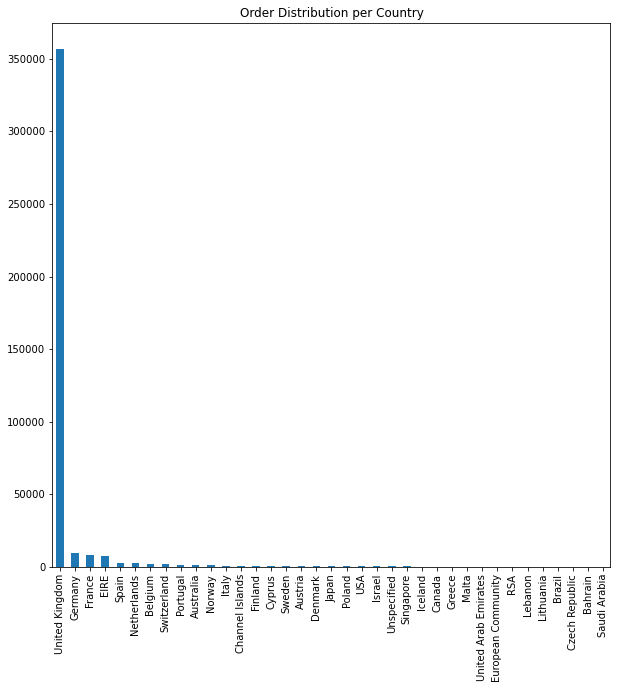

In [14]:
plt.figure(figsize = (10,10))
df['Country'].value_counts().plot(kind = "bar",title ="Order Distribution per Country")

Based from the graph above, we see that out of 37 countries, UK dominates the data in terms of number of orders, however,<br>
we would also like to see how many unique users, products, and transactions were made in this data.

In [15]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3684,22190,4372


We see on the table above that we have 4,372 unique users which bought 3,684 unique products for 22,190 transactions

Moving forward, based on the described table above, we know that there are values in quantity and unit price which are negative, <br>
We will try to filter these values and check if ever they have patterns

In [16]:
negative_quantity = df[(df['Quantity'] < 0)]
negative_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


We see that we have 8,872 rows with negative quantities, interestingy, all of the Invoice Numbers of these rows start with "C". Upon research,<br>
these indicates that the transaction has been **cancelled**. The number of transactions in this format corresponds to **8,872 rows or about 2.2%** of our whole data.<br>
We can also see that most of the entries came from UK.
At this point, we will try to further investigate this scenario, thus requiring to have a copy of our initially cleaned/explored data. 

In [17]:
df_initial_clean = df.copy()

In [18]:
negative_quantity["Country"].value_counts()

United Kingdom        7501
Germany                453
EIRE                   247
France                 148
USA                    112
Australia               74
Spain                   48
Italy                   45
Belgium                 38
Japan                   37
Switzerland             35
Portugal                18
Malta                   15
Norway                  14
Poland                  11
Sweden                  11
Channel Islands         10
Finland                 10
Denmark                  9
Cyprus                   8
Netherlands              8
Singapore                7
Czech Republic           5
Austria                  3
Israel                   2
Saudi Arabia             1
European Community       1
Greece                   1
Name: Country, dtype: int64

Since these rows only consists about 2.2% of our dataframe, we can delete it as this will provide no value on the segmentation, and eventually be problematic <br>
on our methodologies moving forward if ever we decide to transform the data, etc.

In [19]:
df = df[df['Quantity'] > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [20]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalAmount
count,392732.000000,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822,22.629195
std,181.588420,22.240725,1713.567773,311.083465
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.390000
75%,12.000000,3.750000,16791.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


We will then run the same analysis done above. However for this time, on a cleaner and correct data

In [21]:
#Final count of products, transactions, and customers
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3665,18536,4339


<AxesSubplot:title={'center':'Order Distribution per Country'}>

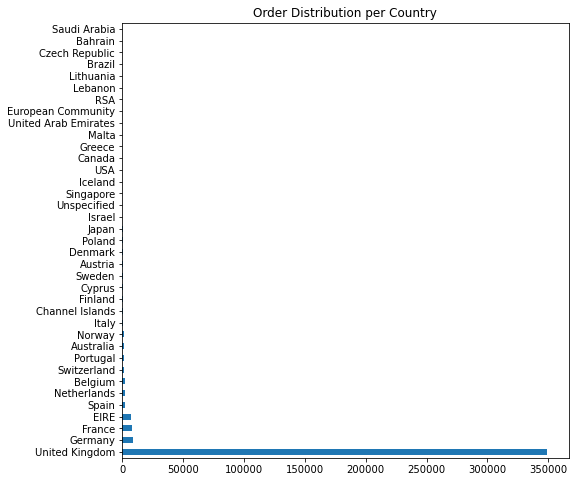

In [22]:
plt.figure(figsize = (8,8))
df['Country'].value_counts().plot(kind = "barh",title ="Order Distribution per Country")

Upon processing the data, we still see that most of the transactions are still under United Kingdom,<br>
We'll figure out whether they also have the highest number of unique customers

In [23]:
cust_count = pd.DataFrame(df.groupby('Country')["CustomerID"].nunique()).reset_index().rename(columns = {'CustomerID' : 'uniqueCustomers'}).sort_values('uniqueCustomers')
cust_count

,Country,uniqueCustomers
11,European Community,1
20,Lebanon,1
16,Iceland,1
27,RSA,1
4,Brazil,1
28,Saudi Arabia,1
21,Lithuania,1
29,Singapore,1
8,Czech Republic,1
22,Malta,2


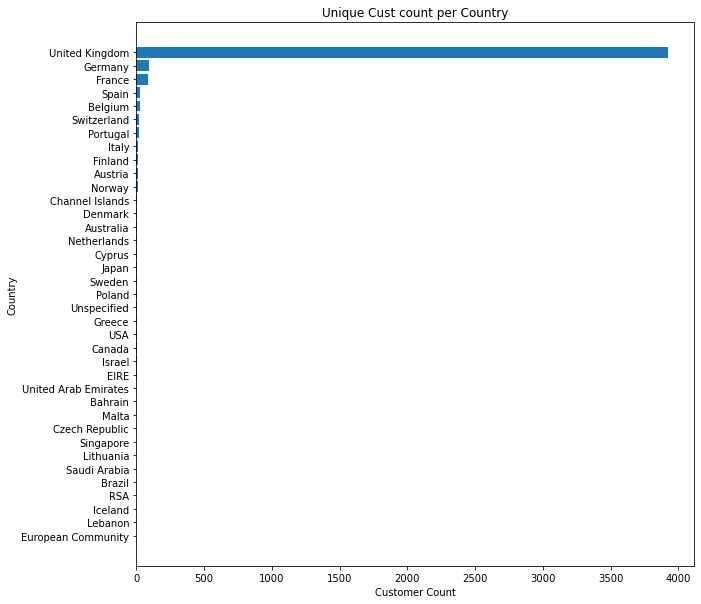

In [24]:
plt.figure(figsize = (10,10))
plt.barh(y = cust_count.Country, width = cust_count.uniqueCustomers) 
plt.title("Unique Cust count per Country")
plt.xlabel("Customer Count")
plt.ylabel("Country")
plt.show()

We can see from above that UK also has the most number of unique customers as well, thus, we try to see whether they have the highest spending

In [25]:
country_amount = df.groupby("Country").agg({"TotalAmount" : "mean"}).reset_index().sort_values("TotalAmount", ascending = True)
country_amount

,Country,TotalAmount
36,Unspecified,11.040539
28,Saudi Arabia,16.213333
27,RSA,17.281207
33,USA,20.002179
3,Belgium,20.283772
35,United Kingdom,20.860428
11,European Community,21.670833
25,Poland,22.226212
7,Cyprus,22.392786
26,Portugal,22.970296


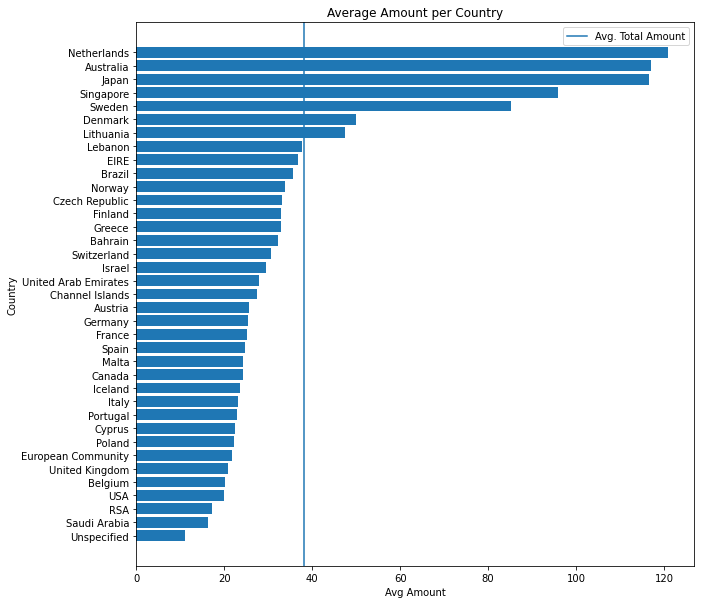

In [26]:
plt.figure(figsize = (10,10))
plt.barh(y = country_amount.Country, width = country_amount.TotalAmount) 
plt.title("Average Amount per Country")
plt.xlabel("Avg Amount")
plt.ylabel("Country")
plt.axvline(country_amount["TotalAmount"].mean(), 0,1, label='Avg. Total Amount')
plt.legend()
plt.show()

However, based on determining the average amount spent, we see that United Kingdom is on the bottom part, even below the total average amount spent

## Start of Analysis

Now that the dataset is clean and explored, we can now do an analysis and create/determine segments of customers. <br>
We plan to use two methodologies for this experiment to compare the results of each approach as the first methodology will rely<br>
on arbitrary choices and other business assumptions in determining the number of segments, <br>while on the other hand, the second methodology will rely purely on a mathematical basis.<br>

The **first methodology** is the manual segmentation of the customers based on quartiles of their RFM score,<br>
The **second methodology** on the other hand, involves the features related to RFM but will be clustered on an unsupervised technique called KMeans Clustering.

By using this methodologies, we can identify our customers based on who recently purchased,
how many times have they purchased from us, and how much have they spent. <br>Thus, by having these details, we can roughly have a bird's eye view about the **stickiness** of our customers.

### Recency, Frequency, Monetary Analysis

In [27]:
#Add 1 to the current date, assume that the data were analyzed 1 day after the most recent transaction
import datetime as dt
curr_date = pd.to_datetime(df['InvoiceDate'].max())+ dt.timedelta(days=1)

In [28]:
curr_date

Timestamp('2011-12-10 12:50:00')

In [29]:
#Get the RFM of each customer here based on the "current date"
cust_group = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x:(curr_date - x.max()).days,
                                            'TotalAmount': 'sum',
                                            'InvoiceNo':'count'})
cust_group.head()

,InvoiceDate,TotalAmount,InvoiceNo
CustomerID,,,
12346.0,326,77183.60,1
12347.0,2,4310.00,182
12348.0,75,1797.24,31
12349.0,19,1757.55,73
12350.0,310,334.40,17


In [30]:
#Rename the Values to RFM
cust_group = cust_group.rename(columns = {"InvoiceDate":"Recency", "InvoiceNo":"Frequency", "TotalAmount" : "Monetary"})
cust_group = cust_group.reset_index()
cust_group.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326,77183.60,1
1,12347.0,2,4310.00,182
2,12348.0,75,1797.24,31
3,12349.0,19,1757.55,73
4,12350.0,310,334.40,17


Now that we have the Recency, Monetary, and Frequency of each customer, <br>
we can label these values per quartile

In [31]:
recency_quartile = pd.qcut(cust_group["Recency"], 4, labels = range(4,0,-1)) #We have to inverse this as we want the most recent customers to have higher recency score
cust_group = cust_group.assign(r_quartile = recency_quartile.values.astype("int64"))

monetary_quartile = pd.qcut(cust_group["Monetary"], 4, labels = range(1,5,1))
cust_group = cust_group.assign(m_quartile = monetary_quartile.values.astype("int64"))

frequency_quartile = pd.qcut(cust_group["Frequency"], 4, labels = range(1,5,1))
cust_group = cust_group.assign(f_quartile = frequency_quartile.values.astype("int64"))

cust_group.head() #We now have a data frame with the RFM values and their quartiles

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile
0,12346.0,326,77183.60,1,1,4,1
1,12347.0,2,4310.00,182,4,4,4
2,12348.0,75,1797.24,31,2,4,2
3,12349.0,19,1757.55,73,3,4,3
4,12350.0,310,334.40,17,1,2,1


In [32]:
cust_group["RFMscore"] = cust_group['r_quartile'] + cust_group["m_quartile"] + cust_group['f_quartile']

In [33]:
cust_group["Segment"] = cust_group['r_quartile'].astype(str) + cust_group['m_quartile'].astype(str) + cust_group['f_quartile'].astype(str)
cust_group

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile,RFMscore,Segment
0,12346.0,326,77183.60,1,1,4,1,6,141
1,12347.0,2,4310.00,182,4,4,4,12,444
2,12348.0,75,1797.24,31,2,4,2,8,242
3,12349.0,19,1757.55,73,3,4,3,10,343
4,12350.0,310,334.40,17,1,2,1,4,121
...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,180.60,10,1,1,1,3,111
4335,18281.0,181,80.82,7,1,1,1,3,111
4336,18282.0,8,178.05,12,4,1,1,6,411
4337,18283.0,4,2045.53,721,4,4,4,12,444


In [34]:
score_count = cust_group["RFMscore"].value_counts().sort_index()
score_count = pd.DataFrame(score_count).reset_index().rename(columns = {"index":"rfmScore", "RFMscore":"CustIDcount"})
score_count

,rfmScore,CustIDcount
0,3,381
1,4,388
2,5,518
3,6,457
4,7,464
5,8,454
6,9,414
7,10,426
8,11,387
9,12,450


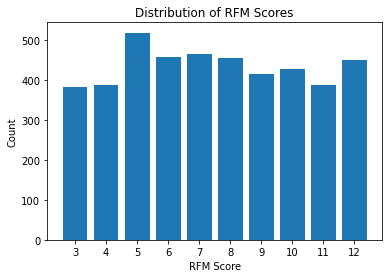

In [35]:
plt.bar(score_count['rfmScore'], score_count['CustIDcount'])
plt.xticks(ticks = range(3,13))
plt.title("Distribution of RFM Scores")
plt.xlabel("RFM Score")
plt.ylabel("Count")
plt.show()

Since our customers now have their RFM scores, we can now assign a range of scores to a quartile. <br>

In [36]:
score_quartile = pd.qcut(score_count["rfmScore"], 4, labels = range(1,5,1))
score_count = score_count.assign(sc_quartile = score_quartile.values.astype("int64"))
score_count

,rfmScore,CustIDcount,sc_quartile
0,3,381,1
1,4,388,1
2,5,518,1
3,6,457,2
4,7,464,2
5,8,454,3
6,9,414,3
7,10,426,4
8,11,387,4
9,12,450,4


Given that we have these quartiles already, we can segment the customers to what *Tier* they belong to.<br>
The higher the RFM score, the higher the rfmScore/quartile, the the lower the *Tier* value.

In [37]:
def segmenter(value):
    if value <= 5: #RFM 3,4,5
        return 4
    elif (value > 5) and (value <= 7): #RFM 6,7,8
        return 3
    elif (value > 7) and (value <= 9): #RFM 9,10,11
        return 2
    else:
        return 1 #RFM >11

In [38]:
cust_group['Tier'] = cust_group['RFMscore'].apply(segmenter)
cust_group.head()

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile,RFMscore,Segment,Tier
0,12346.0,326,77183.60,1,1,4,1,6,141,3
1,12347.0,2,4310.00,182,4,4,4,12,444,1
2,12348.0,75,1797.24,31,2,4,2,8,242,2
3,12349.0,19,1757.55,73,3,4,3,10,343,1
4,12350.0,310,334.40,17,1,2,1,4,121,4


In [39]:
tier_group = cust_group.groupby(['Tier']).agg({"CustomerID":"count",
                                               "Recency":"mean",
                                             "Monetary":"mean",
                                             "Frequency":"mean"})

tier_group = tier_group.reset_index()
tier_group

,Tier,CustomerID,Recency,Monetary,Frequency
0,1,1263,20.054632,5246.781298,225.641330
1,2,868,55.420507,1372.597733,66.858295
2,3,921,87.606949,788.400045,32.930510
3,4,1287,192.165501,266.505704,15.062160


<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

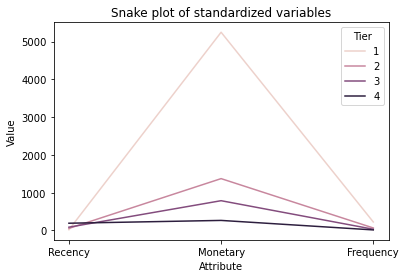

In [40]:
import seaborn as sns
tier_melt = pd.melt(tier_group,
                    id_vars=['CustomerID', 'Tier'],
                    value_vars=['Recency', 'Monetary','Frequency'],
                    var_name='Attribute',
                    value_name='Value')

# Building the snakeplot
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Tier', data=tier_melt)

<AxesSubplot:xlabel='Tier'>

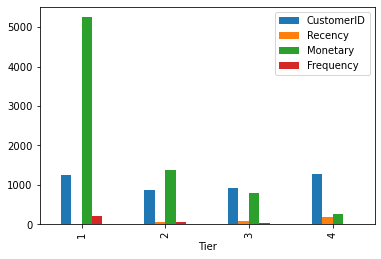

In [41]:
tier_group.plot(x = "Tier",
               kind = "bar",
               stacked = False)

In [42]:
def segment_name(value):
    if value == 4: #RFM 3,4,5
        return "Classic"
    elif value == 3: #RFM 6,7,8
        return "Silver"
    elif value == 2: #RFM 9,10,11
        return "Gold"
    else:
        return "Platinum" #RFM >11

In [43]:
cust_group['Tier_Name'] = cust_group['Tier'].apply(segment_name)
cust_group.head()

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile,RFMscore,Segment,Tier,Tier_Name
0,12346.0,326,77183.60,1,1,4,1,6,141,3,Silver
1,12347.0,2,4310.00,182,4,4,4,12,444,1,Platinum
2,12348.0,75,1797.24,31,2,4,2,8,242,2,Gold
3,12349.0,19,1757.55,73,3,4,3,10,343,1,Platinum
4,12350.0,310,334.40,17,1,2,1,4,121,4,Classic


In [44]:
segment_name_group = cust_group.groupby(['Tier_Name']).agg({"CustomerID":"count",
                                               "Recency":"mean",
                                             "Monetary":"mean",
                                             "Frequency":"mean"})

segment_name_group = segment_name_group.reset_index()
segment_name_group

,Tier_Name,CustomerID,Recency,Monetary,Frequency
0,Classic,1287,192.165501,266.505704,15.062160
1,Gold,868,55.420507,1372.597733,66.858295
2,Platinum,1263,20.054632,5246.781298,225.641330
3,Silver,921,87.606949,788.400045,32.930510


<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

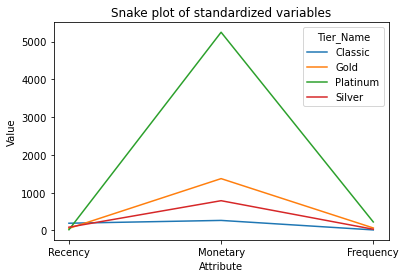

In [45]:
import seaborn as sns
segment_name_melt = pd.melt(segment_name_group,
                    id_vars=['CustomerID', 'Tier_Name'],
                    value_vars=['Recency', 'Monetary','Frequency'],
                    var_name='Attribute',
                    value_name='Value')

# Building the snakeplot
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Tier_Name', data=segment_name_melt)

<AxesSubplot:xlabel='Tier_Name'>

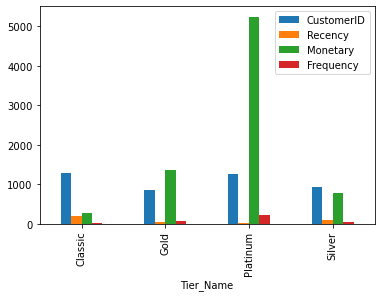

In [46]:
segment_name_group.plot(x = "Tier_Name",
               kind = "bar",
               stacked = False)

Based on the plot above, we can see that our we can say that our customers are somehow evenly distributed per segment with <br>
**Classic** and **Platinum** segments having the most.
Furthermore, as expected, our customers in the **Classic** segment are our customers that performed the worst among the rest in terms of all the measures.
These customers have the highest recency thus they are inactive and have the lowest spending amount and frequency of transaction. Thus, these are the customers that<br>
the company needs to handle with care and improve relationships with. The company can achieve this by providing this segment good products and great customer care services.<br>
On the other hand, our **Silver** Customers are the customers that are near to exit as these are customers with somehow low spending and high recency, thus, the company can try to recapture these customers by offering deals just specific for them.<br> Our **Gold** Customers have spent more than the average amount, however, <br>
these customers are at risk of churning as their recency is quite high, thus, in order to retain them, the company may run various advertising and discounts for<br>
this particular group. <br>Finally, our **Platinum** customers are our best customers, this is the customer group that has the lowest recency, highest monetary value, and highest frequency as well. The company should target these customers with repeated advertising and special offering of new products as this group has a high chance of buying them immediately. Although discounts are not needed for this group, a special customer care initiative may be beneficial in terms of taking care of this segment

In [47]:
cust_group

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile,RFMscore,Segment,Tier,Tier_Name
0,12346.0,326,77183.60,1,1,4,1,6,141,3,Silver
1,12347.0,2,4310.00,182,4,4,4,12,444,1,Platinum
2,12348.0,75,1797.24,31,2,4,2,8,242,2,Gold
3,12349.0,19,1757.55,73,3,4,3,10,343,1,Platinum
4,12350.0,310,334.40,17,1,2,1,4,121,4,Classic
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,180.60,10,1,1,1,3,111,4,Classic
4335,18281.0,181,80.82,7,1,1,1,3,111,4,Classic
4336,18282.0,8,178.05,12,4,1,1,6,411,3,Silver
4337,18283.0,4,2045.53,721,4,4,4,12,444,1,Platinum


In [48]:
#Get distribution per country
country_count= df.groupby(['Country']).size().to_frame('Total_Orders_in_country').reset_index()
#country_count

df_with_country = cust_group.merge(df[['CustomerID','Country']], how='inner', on='CustomerID')
result= df_with_country.groupby(['Tier_Name','Country']).size().to_frame('order_count').reset_index()
country_data= result.merge(country_count, how='inner', on='Country')
country_data= result.merge(country_count, how='inner', on='Country')

In [49]:
country_data["percentage"] = (country_data["order_count"] / country_data["Total_Orders_in_country"]) * 100
country_data.head()

,Tier_Name,Country,order_count,Total_Orders_in_country,percentage
0,Classic,Australia,22,1184,1.858108
1,Gold,Australia,114,1184,9.628378
2,Platinum,Australia,997,1184,84.206081
3,Silver,Australia,51,1184,4.307432
4,Classic,Austria,50,398,12.562814


In [50]:
country_data[country_data["Tier_Name"] == "Platinum"].sort_values(["percentage", "order_count"], ascending = False).reset_index().head(10)

,index,Tier_Name,Country,order_count,Total_Orders_in_country,percentage
0,96,Platinum,Singapore,222,222,100.000000
1,95,Platinum,Iceland,182,182,100.000000
2,87,Platinum,EIRE,7067,7228,97.772551
3,53,Platinum,Norway,975,1072,90.951493
4,50,Platinum,Netherlands,2146,2363,90.816758
5,2,Platinum,Australia,997,1184,84.206081
6,28,Platinum,France,6678,8327,80.196950
7,32,Platinum,Germany,7013,9027,77.689155
8,10,Platinum,Belgium,1505,2031,74.101428
9,81,Platinum,United Kingdom,251111,349227,71.904807


In [51]:
country_data[country_data["Tier_Name"] == "Classic"].sort_values(["percentage", "order_count"], ascending = False).reset_index().head(10)

,index,Tier_Name,Country,order_count,Total_Orders_in_country,percentage
0,7,Classic,Bahrain,17,17,100.000000
1,62,Classic,Saudi Arabia,9,9,100.000000
2,34,Classic,Greece,22,145,15.172414
3,37,Classic,Israel,31,245,12.653061
4,4,Classic,Austria,50,398,12.562814
5,75,Classic,USA,22,179,12.290503
6,12,Classic,Canada,16,151,10.596026
7,40,Classic,Italy,77,758,10.158311
8,44,Classic,Japan,31,321,9.657321
9,58,Classic,Portugal,132,1453,9.084652


Based on the table above, we can conclude that many of our customers are outisde the "Basic" tier already, as based on the top 10, the percentage of our "Basic"<br>
orders or <20% excluding the Bahrain and Saudi Arabia. Furthermore, we can see that our most valuable regions are: Singapore, Iceland, Ireland, Norway,<br>
Netherlands, Australia, France, Germany, Belgium, and United Kingdom.

Moving forward, we will try this segmentation based on an unsupervised learning method called **K-means** so that we do not have to manually/arbitrarily declare<br>
the number of possible segments that we will be creating, we will then gauge which methodology produced the most distinct segmentation of our customer base.

### K-means method

In [52]:
df2 = cust_group.copy()

In [53]:
df2

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile,RFMscore,Segment,Tier,Tier_Name
0,12346.0,326,77183.60,1,1,4,1,6,141,3,Silver
1,12347.0,2,4310.00,182,4,4,4,12,444,1,Platinum
2,12348.0,75,1797.24,31,2,4,2,8,242,2,Gold
3,12349.0,19,1757.55,73,3,4,3,10,343,1,Platinum
4,12350.0,310,334.40,17,1,2,1,4,121,4,Classic
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,180.60,10,1,1,1,3,111,4,Classic
4335,18281.0,181,80.82,7,1,1,1,3,111,4,Classic
4336,18282.0,8,178.05,12,4,1,1,6,411,3,Silver
4337,18283.0,4,2045.53,721,4,4,4,12,444,1,Platinum


Since we will be using the KMeans algorithm here, we would like to satisfy various cases such as normal/symmetric distribution of the variables.<br>

/Users/philip/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

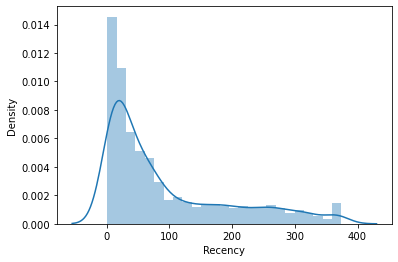

In [54]:
import seaborn as sns
sns.distplot(df2["Recency"])

/Users/philip/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

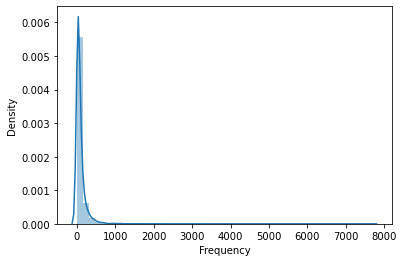

In [55]:
sns.distplot(df2["Frequency"])

/Users/philip/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

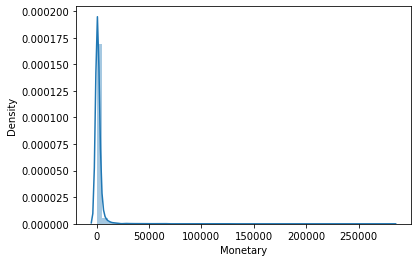

In [56]:
sns.distplot(df2["Monetary"])

Based on the graphs above, we see that the features that we will be using are skewed. <br>
Thus, we need to transform the data to reduce its skewness, afterwards, if the data is still skewed,<br>
We can still work on it as we can defend this already via the Central Limit Theorem<br>

In this case, although there are other normalization techniques, I have decided to use **log transform**.

In [57]:
df3 = df2[["Recency", "Monetary", "Frequency"]]
df3["Monetary"] = df3["Monetary"] + 1 #We add 1 on the values of monetary column to reduce the risk of having 0 values.

/Users/philip/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
for col in ["Recency", "Frequency", "Monetary"]:
    df3[col] = np.log(df3[col])
df3

/Users/philip/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Recency,Monetary,Frequency
0,5.786897,11.253955,0.000000
1,0.693147,8.368925,5.204007
2,4.317488,7.494564,3.433987
3,2.944439,7.472245,4.290459
4,5.736572,5.815324,2.833213
...,...,...,...
4334,5.627621,5.201806,2.302585
4335,5.198497,4.404522,1.945910
4336,2.079442,5.187665,2.484907
4337,1.386294,7.623901,6.580639


/Users/philip/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

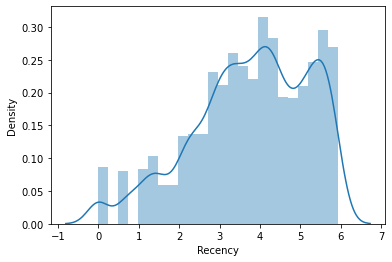

In [59]:
sns.distplot(df3["Recency"])

/Users/philip/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

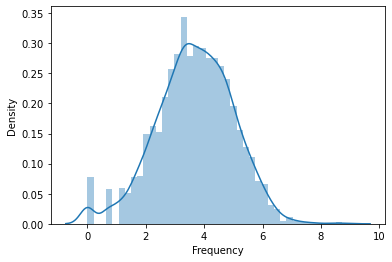

In [60]:
sns.distplot(df3["Frequency"])

/Users/philip/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

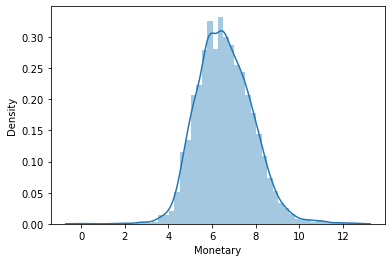

In [61]:
sns.distplot(df3["Monetary"])

We can see from the graphs above that the skewness were removed. A big difference compared the distribution without log-transform.<br>
Thus, in this case, we can already proceed to the usual processing such as scaling of features. Although PCA is commonly used when doing a clustering method,<br>
we will not use it on this analysis as we will only use three features.

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df3)
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = ["Recency", "Monetary", "Frequency"]
scaled_df

,Recency,Monetary,Frequency
0,1.410138,3.697687,-2.777736
1,-2.146411,1.411820,1.160122
2,0.384170,0.719046,-0.179247
3,-0.574518,0.701362,0.468843
4,1.375000,-0.611449,-0.633851
...,...,...,...
4334,1.298928,-1.097551,-1.035376
4335,0.999306,-1.729256,-1.305271
4336,-1.178475,-1.108756,-0.897414
4337,-1.662443,0.821523,2.201816


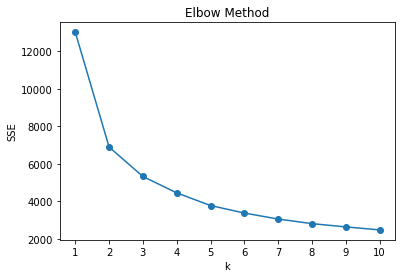

In [63]:
from sklearn.cluster import KMeans
sse = list()
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 2021)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,11,1), sse, marker = "o")
plt.xticks(ticks = range(1,11))
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()

In [64]:
from sklearn.metrics import silhouette_score
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, random_state = 2021)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print(f"n_cluster {i}, Silhouette Score: {silhouette_avg}")

n_cluster 2, Silhouette Score: 0.39482965388541447
n_cluster 3, Silhouette Score: 0.3036060834813621
n_cluster 4, Silhouette Score: 0.3024511301609014
n_cluster 5, Silhouette Score: 0.2777130447504727
n_cluster 6, Silhouette Score: 0.27686545699915405
n_cluster 7, Silhouette Score: 0.26423719118270883
n_cluster 8, Silhouette Score: 0.2620085589336433
n_cluster 9, Silhouette Score: 0.25111999938088986
n_cluster 10, Silhouette Score: 0.2632053107365173


Given the following results, we can decide now based on the number of clusters, on the elbow plot, we can see that the number of clusters should be around 2-4, <br>
this is also shown by the silhouette score, in this case, 2 is the nearest to 1. However, scenarios like this -- where there is no clear answer/definition on the tests <br>
require understanding and other insights specific for the business cases or business rules. In this case, we think, if we choose 2, will this properly segment and show<br>
the differences between our customers? On the other hand, if we choose 4, is the decrease on the sum of squared errors that big that we will risk on creating another<br>
customer segment that we will monitor in the long run? (e.g. a different segment to run ads on). By thinking about these questions, I have decided to use cluster = 3 <br>
as for me, this will give me a good segmentation already.

In [65]:
kmeans = KMeans(n_clusters = 3, random_state = 2021)
kmeans.fit(scaled_df)
clusters = kmeans.labels_
df2['Clusters'] = clusters

In [66]:
df2['Clusters'].value_counts()

2    1859
0    1527
1     953
Name: Clusters, dtype: int64

In [67]:
df2

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile,RFMscore,Segment,Tier,Tier_Name,Clusters
0,12346.0,326,77183.60,1,1,4,1,6,141,3,Silver,2
1,12347.0,2,4310.00,182,4,4,4,12,444,1,Platinum,1
2,12348.0,75,1797.24,31,2,4,2,8,242,2,Gold,2
3,12349.0,19,1757.55,73,3,4,3,10,343,1,Platinum,2
4,12350.0,310,334.40,17,1,2,1,4,121,4,Classic,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,180.60,10,1,1,1,3,111,4,Classic,0
4335,18281.0,181,80.82,7,1,1,1,3,111,4,Classic,0
4336,18282.0,8,178.05,12,4,1,1,6,411,3,Silver,0
4337,18283.0,4,2045.53,721,4,4,4,12,444,1,Platinum,1


In [68]:
df2

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile,RFMscore,Segment,Tier,Tier_Name,Clusters
0,12346.0,326,77183.60,1,1,4,1,6,141,3,Silver,2
1,12347.0,2,4310.00,182,4,4,4,12,444,1,Platinum,1
2,12348.0,75,1797.24,31,2,4,2,8,242,2,Gold,2
3,12349.0,19,1757.55,73,3,4,3,10,343,1,Platinum,2
4,12350.0,310,334.40,17,1,2,1,4,121,4,Classic,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,180.60,10,1,1,1,3,111,4,Classic,0
4335,18281.0,181,80.82,7,1,1,1,3,111,4,Classic,0
4336,18282.0,8,178.05,12,4,1,1,6,411,3,Silver,0
4337,18283.0,4,2045.53,721,4,4,4,12,444,1,Platinum,1


In [69]:
cust_group_clustering = df2[["CustomerID","Recency","Monetary","Frequency","Clusters"]]

In [70]:
tier_group_clustering = cust_group_clustering.groupby(['Clusters']).agg({"CustomerID":"count",
                                               "Recency":"mean",
                                             "Monetary":"mean",
                                             "Frequency":"mean"})

tier_group_clustering = tier_group_clustering.reset_index()
tier_group_clustering

,Clusters,CustomerID,Recency,Monetary,Frequency
0,0,1527,170.840864,293.261762,14.910282
1,1,953,13.078699,6573.663757,260.491081
2,2,1859,68.907477,1169.820669,65.473911


<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

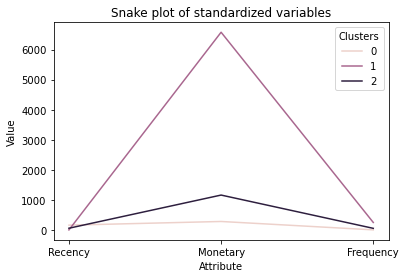

In [71]:
import seaborn as sns
tier_melt_clustering = pd.melt(tier_group_clustering,
                    id_vars=['CustomerID', 'Clusters'],
                    value_vars=['Recency', 'Monetary','Frequency'],
                    var_name='Attribute',
                    value_name='Value')

# Building the snakeplot
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Clusters', data=tier_melt_clustering)

<AxesSubplot:xlabel='Clusters'>

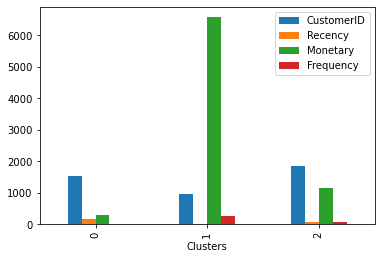

In [72]:
tier_group_clustering.plot(x = "Clusters",
               kind = "bar",
               stacked = False)

In [73]:
def cluster_name(cluster):
    if cluster == 1:
        return "Platinum"
    elif cluster == 2:
        return "Optimal"
    else:
        return "Basic"

In [74]:
df2['Cluster_Name'] = df2['Clusters'].apply(cluster_name)
df2.head()

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile,RFMscore,Segment,Tier,Tier_Name,Clusters,Cluster_Name
0,12346.0,326,77183.60,1,1,4,1,6,141,3,Silver,2,Optimal
1,12347.0,2,4310.00,182,4,4,4,12,444,1,Platinum,1,Platinum
2,12348.0,75,1797.24,31,2,4,2,8,242,2,Gold,2,Optimal
3,12349.0,19,1757.55,73,3,4,3,10,343,1,Platinum,2,Optimal
4,12350.0,310,334.40,17,1,2,1,4,121,4,Classic,0,Basic


In [75]:
tier_group_clustering['Cluster_Name'] = tier_group_clustering['Clusters'].apply(cluster_name)

<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

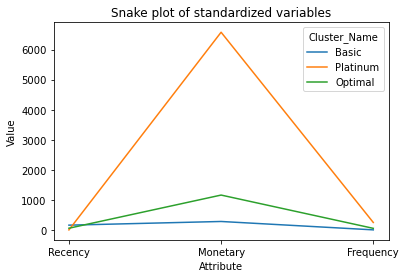

In [76]:
import seaborn as sns
tier_melt_clustering_2 = pd.melt(tier_group_clustering,
                    id_vars=['CustomerID', 'Cluster_Name'],
                    value_vars=['Recency', 'Monetary','Frequency'],
                    var_name='Attribute',
                    value_name='Value')

# Building the snakeplot
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster_Name', data=tier_melt_clustering_2)

<AxesSubplot:xlabel='Cluster_Name'>

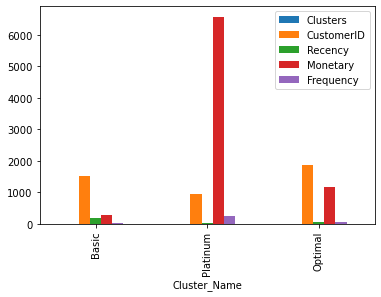

In [77]:
tier_group_clustering.plot(x = "Cluster_Name",
               kind = "bar",
               stacked = False)

In [78]:
tier_group_clustering

,Clusters,CustomerID,Recency,Monetary,Frequency,Cluster_Name
0,0,1527,170.840864,293.261762,14.910282,Basic
1,1,953,13.078699,6573.663757,260.491081,Platinum
2,2,1859,68.907477,1169.820669,65.473911,Optimal


For this methodology, we are presented with 3 segments of customers particularly: **Basic**, **Optimal**, and **Platinum**.<br>
As expected, our **Basic** customers are our customers with the lowest monetary value, lowest frequency value, and highest frequency value, thus,
these are the customers that have stopped transacting with the company, one strategy for this segment is to run various surveys to find out the reason of leaving <br>
and figuring out the pain points thus improving the company's services further.<br>
Our **optimal** cluster are our customers that are casually transacting with us from time to time. We can improve our relationship with this cluster by further offering<br>
them specific discounts and promotions.
Finally, our **Platinum** cluster are our customers with the highest amount of transaction, highest frequency of transaction, and lowest recency of transaction.<br>
This is our most valuable cluster, thus, it can be seen that this cluster does not need heavy discounts or promotion, what the company can offer to this cluster are <br>
various deals on new products already, and a special customer care service to improve the relationship further.

In [79]:
df2

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile,RFMscore,Segment,Tier,Tier_Name,Clusters,Cluster_Name
0,12346.0,326,77183.60,1,1,4,1,6,141,3,Silver,2,Optimal
1,12347.0,2,4310.00,182,4,4,4,12,444,1,Platinum,1,Platinum
2,12348.0,75,1797.24,31,2,4,2,8,242,2,Gold,2,Optimal
3,12349.0,19,1757.55,73,3,4,3,10,343,1,Platinum,2,Optimal
4,12350.0,310,334.40,17,1,2,1,4,121,4,Classic,0,Basic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,180.60,10,1,1,1,3,111,4,Classic,0,Basic
4335,18281.0,181,80.82,7,1,1,1,3,111,4,Classic,0,Basic
4336,18282.0,8,178.05,12,4,1,1,6,411,3,Silver,0,Basic
4337,18283.0,4,2045.53,721,4,4,4,12,444,1,Platinum,1,Platinum


In [80]:
#Get distribution per country
country_count_clustering= df.groupby(['Country']).size().to_frame('Total_Orders_in_country').reset_index()
#country_count

df_with_country_clustering = df2.merge(df[['CustomerID','Country']], how='inner', on='CustomerID')
result_clustering = df_with_country_clustering.groupby(['Cluster_Name','Country']).size().to_frame('order_count').reset_index()
country_data_clustering = result_clustering.merge(country_count_clustering, how='inner', on='Country')
country_data_clustering = result_clustering.merge(country_count_clustering, how='inner', on='Country')

country_data_clustering["percentage"] = (country_data_clustering["order_count"] / country_data_clustering["Total_Orders_in_country"]) * 100
country_data_clustering.head()

,Cluster_Name,Country,order_count,Total_Orders_in_country,percentage
0,Basic,Australia,22,1184,1.858108
1,Optimal,Australia,165,1184,13.935811
2,Platinum,Australia,997,1184,84.206081
3,Basic,Austria,50,398,12.562814
4,Optimal,Austria,300,398,75.376884


### TOP 10 Platinum and Classic Countries when using Kmeans Clustering

In [81]:
country_data_clustering[country_data_clustering["Cluster_Name"] == "Platinum"].sort_values(["percentage", "order_count"], ascending = False).reset_index().head(10)

,index,Cluster_Name,Country,order_count,Total_Orders_in_country,percentage
0,81,Platinum,Singapore,222,222,100.000000
1,80,Platinum,Iceland,182,182,100.000000
2,73,Platinum,EIRE,7067,7228,97.772551
3,42,Platinum,Netherlands,2080,2363,88.023699
4,2,Platinum,Australia,997,1184,84.206081
5,45,Platinum,Norway,890,1072,83.022388
6,26,Platinum,France,6324,8327,75.945719
7,29,Platinum,Germany,6388,9027,70.765481
8,17,Platinum,Cyprus,403,603,66.832504
9,51,Platinum,Portugal,930,1453,64.005506


In [82]:
country_data_clustering[country_data_clustering["Cluster_Name"] == "Basic"].sort_values(["percentage", "order_count"], ascending = False).reset_index().head(10)

,index,Cluster_Name,Country,order_count,Total_Orders_in_country,percentage
0,6,Basic,Bahrain,17,17,100.000000
1,52,Basic,Saudi Arabia,9,9,100.000000
2,37,Basic,Japan,53,321,16.510903
3,30,Basic,Greece,22,145,15.172414
4,32,Basic,Israel,31,245,12.653061
5,3,Basic,Austria,50,398,12.562814
6,62,Basic,USA,22,179,12.290503
7,34,Basic,Italy,88,758,11.609499
8,56,Basic,Sweden,52,450,11.555556
9,10,Basic,Canada,16,151,10.596026


### TOP 10 Platinum and Classic Countries when using Manual RFM Model

In [83]:
country_data[country_data["Tier_Name"] == "Platinum"].sort_values(["percentage", "order_count"], ascending = False).reset_index().head(10)

,index,Tier_Name,Country,order_count,Total_Orders_in_country,percentage
0,96,Platinum,Singapore,222,222,100.000000
1,95,Platinum,Iceland,182,182,100.000000
2,87,Platinum,EIRE,7067,7228,97.772551
3,53,Platinum,Norway,975,1072,90.951493
4,50,Platinum,Netherlands,2146,2363,90.816758
5,2,Platinum,Australia,997,1184,84.206081
6,28,Platinum,France,6678,8327,80.196950
7,32,Platinum,Germany,7013,9027,77.689155
8,10,Platinum,Belgium,1505,2031,74.101428
9,81,Platinum,United Kingdom,251111,349227,71.904807


In [84]:
country_data[country_data["Tier_Name"] == "Classic"].sort_values(["percentage", "order_count"], ascending = False).reset_index().head(10)

,index,Tier_Name,Country,order_count,Total_Orders_in_country,percentage
0,7,Classic,Bahrain,17,17,100.000000
1,62,Classic,Saudi Arabia,9,9,100.000000
2,34,Classic,Greece,22,145,15.172414
3,37,Classic,Israel,31,245,12.653061
4,4,Classic,Austria,50,398,12.562814
5,75,Classic,USA,22,179,12.290503
6,12,Classic,Canada,16,151,10.596026
7,40,Classic,Italy,77,758,10.158311
8,44,Classic,Japan,31,321,9.657321
9,58,Classic,Portugal,132,1453,9.084652


The results for the best and underperforming regions are somehow the same using the kmeans methodology.

## Conclusion

In this analysis, we analyzed and tried two methodologies to determine the proper segmentation of the company. We found out that based on the results of clusters <br>
The optimal number of clusters can be 3-4. However, by basing on the effects and results, the clustering algorithm was able to return a cluster that are more distinct with one another. Although the results from the manual RFM analysis returned detailed results, we can see that there is little to no difference with regards to the **Classic** and **Silver** cluster thus, making it harder to monitor and will probably incur more cost in the long run as different programs/campaigns will be run for each segment, unlike when we just group it to one *Basic* Segment which was done in the kmeans clustering method.

Furthermore, various insights were extracted from the data such as:<br>
    - Our most dominant market is the UK market, with more than half of the transactions and unique customers coming from this region.<br>
    - Even though our most dominant market is the UK market, they have significantly lower average total transaction amount compared to other regions.<br>
    - Singapore, Iceland, Ireland, Norway, Netherlands, Australia, Germany, and France were all consistent in being valuable regions for the company as <br>
        these regions were consistent to be part of the top 10 regions with a high percentage of *Platinum* orders.<br>

With these results, the best business performance metrics that the company should consider are the following:<br>
    - The total of the following metrics: count, amount, quantity, unit price<br>
    - The average of the following metrics: count, amount, quantity, unit price<br>
    - The trend of transaction amount and count<br>
    - the number of unique customers transacting per region<br>
    - The number of customers that they *won* (e.g. customers from the Basic tier to Optimal tier)<br>
    - The %increase/decrease in transactions of each country<br>

Finally, if I were to deploy this model in production, the main steps and considerations are the following:<br>
   - The first step that I am going to take is to package my model by saving it as a pkl file and secure it. Next is that I will determine on how or who will use the model, as I were just to deploy the model in product, this will entail that only users with access to the production machine can use it, such as, if this model will be used by people from say other departments, not all of them will have access as well. Thus, this will determine if ever I will be exposing my model as a REST api. In the assumption that this will be the case, I will determine the framework whether it's Django/Flask/etc. Now, with the assumption that the pipelines are in place, I can go back to finalize and perform other testing for the model. Now, with the models deployed, I will then monitor its performance based on a given SLA, this is also for me to determine whether there are data drifts and other problems that may occur.